In [1]:
import numpy as np 
import pandas as pd 

In [ ]:
# MAIN SECTION- A1
# MRV VYSHNAVI
# BL.EN.U4CSE21114

In [7]:
#mdata = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [15]:
import pandas as pd
import math  


data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)





def calculate_entropy(data, target_col):
    entropy = 0
    total_count = len(data)
    
   
    class_counts = data[target_col].value_counts()
    
   
    for count in class_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy


target_col = 'buys_computer'
entropies = {}
for col in df.columns:
    if col != target_col:  
        feature_entropy = calculate_entropy(df, col)
        entropies[col] = feature_entropy


print("Entropy for each attribute:")
for feature, entropy in entropies.items():
    print(f'{feature}: {entropy:.4f}')
    
    
    
    
    
    
    
   

df_encoded = pd.get_dummies(df.drop(columns=['buys_computer']))


clf = DecisionTreeClassifier()


clf.fit(df_encoded, df['buys_computer'])


feature_importances = clf.feature_importances_


first_feature_index = feature_importances.argmax()


first_feature = df_encoded.columns[first_feature_index]

print(f"The first feature selected for constructing the decision tree is: {first_feature}")










df_encoded = pd.get_dummies(df.drop(columns=['buys_computer']))


X = df_encoded
y = df['buys_computer']


clf = DecisionTreeClassifier(criterion='entropy')


clf.fit(X, y)


root_node_feature = X.columns[clf.tree_.feature[0]]

print(f"The root node feature selected using Information Gain is: {root_node_feature}")


Entropy for each attribute:
age: 1.5774
income: 1.5567
student: 1.0000
credit_rating: 0.9852
The first feature selected for constructing the decision tree is: student_yes
The root node feature selected using Information Gain is: age_31...40


In [ ]:
# A2

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)


label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


X = df.drop('buys_computer', axis=1)
y = df['buys_computer']


model = DecisionTreeClassifier()
model.fit(X, y)


training_accuracy = model.score(X, y)
print("Training Set Accuracy:", training_accuracy)


tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 4


In [ ]:
#A3

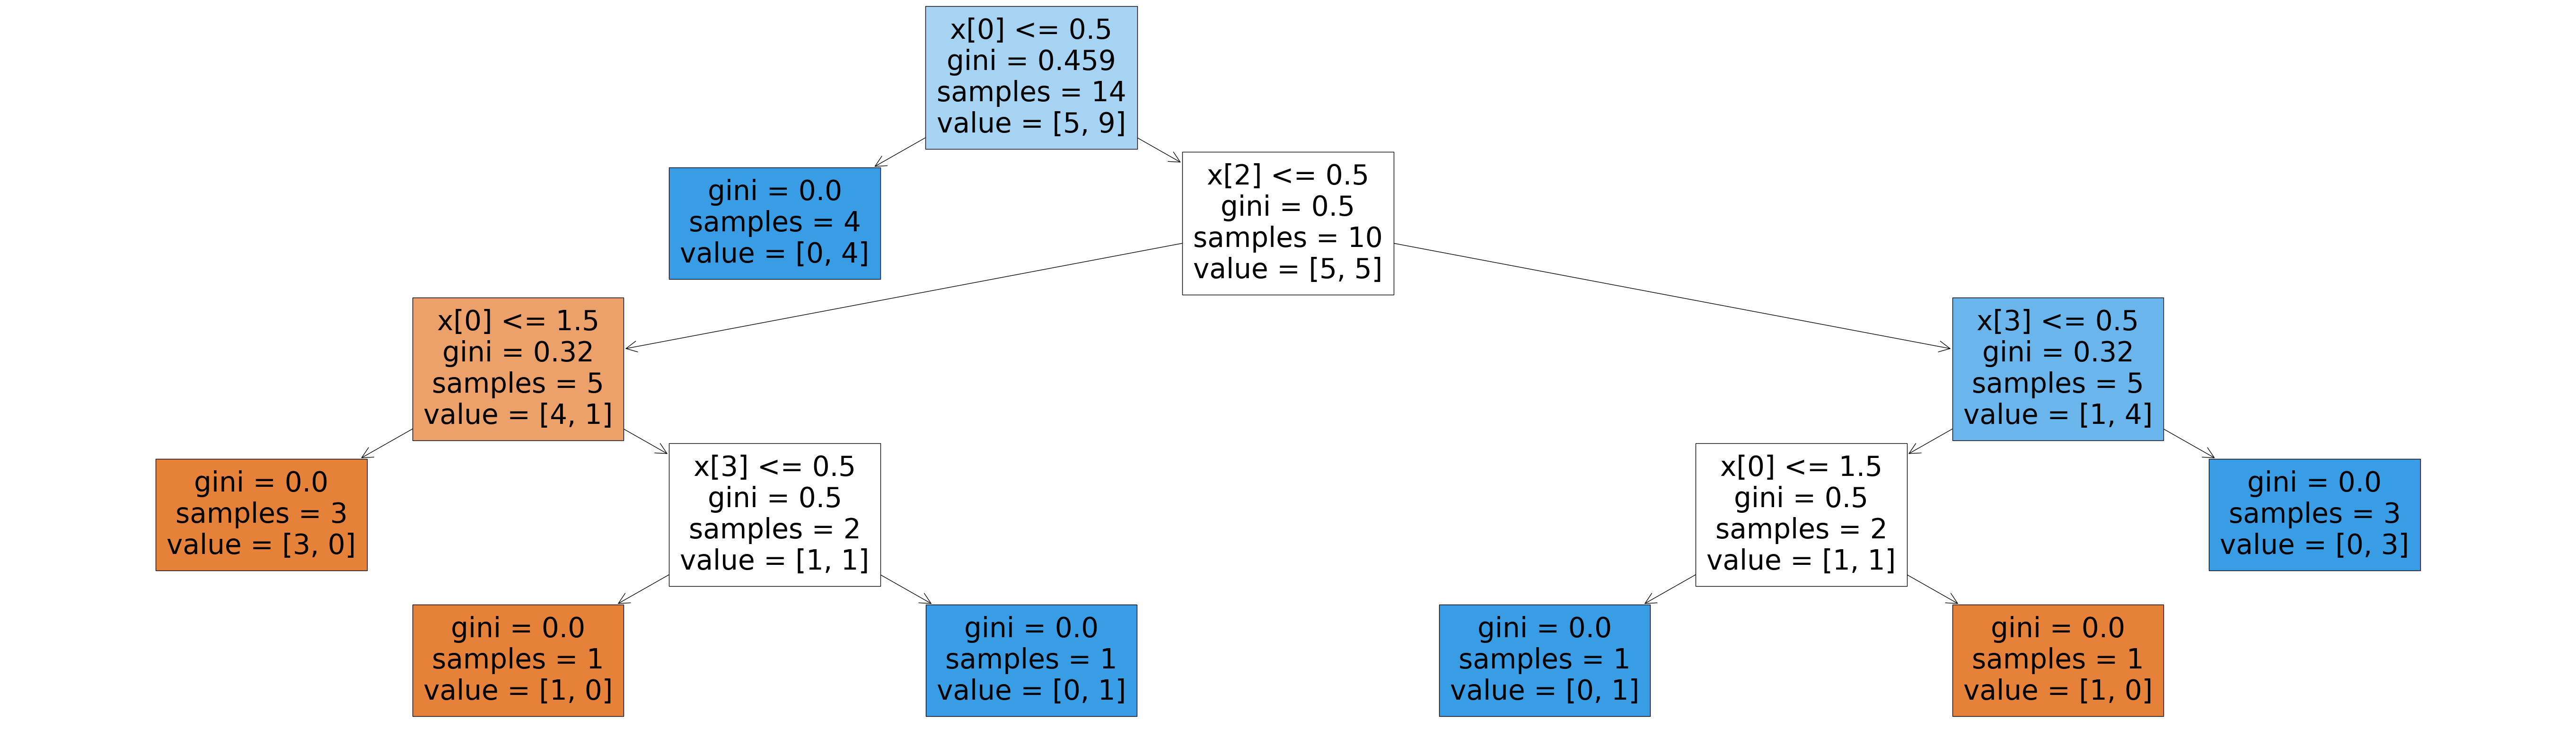

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.show()


In [ ]:
#A4

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


data = pd.read_csv('ML_Dataset_final.csv')


categorical_columns = ['Location', 'Weather Condition']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['Location', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature (°C)', 'Humidity (%)']]
y = data['Music Genre Preferences']


Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)


train_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", train_accuracy)


test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)


Training Set Accuracy: 0.9999500080701258
Test Set Accuracy: 0.199515508858532


In [ ]:
#A5

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('ML_Dataset_final.csv')


label_encoders = {}
categorical_columns = ['Location', 'Weather Condition']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['Location', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature (°C)', 'Humidity (%)']]
y = data['Music Genre Preferences']


Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(Tr_X, Tr_y)


train_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy (max_depth=5):", train_accuracy)


test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy (max_depth=5):", test_accuracy)


Training Set Accuracy (max_depth=5): 0.20293581179038242
Test Set Accuracy (max_depth=5): 0.19633889241211455


In [ ]:
#A6

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('ML_Dataset_final.csv')


label_encoders = {}
categorical_columns = ['Location', 'Weather Condition']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['Location', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature (°C)', 'Humidity (%)']]
y = data['Music Genre Preferences']


Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)


train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("Training Set Accuracy (Entropy):", train_accuracy_entropy)


test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("Test Set Accuracy (Entropy):", test_accuracy_entropy)


Training Set Accuracy (Entropy): 0.9999500080701258
Test Set Accuracy (Entropy): 0.20065817664501312


In [ ]:
#A7

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder 


data = pd.read_csv('ML_Dataset_final.csv')


label_encoders = {}
categorical_columns = ['Location', 'Weather Condition']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['Location', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature (°C)', 'Humidity (%)']]
y = data['Music Genre Preferences']


Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(Tr_X, Tr_y)


rf_predictions = rf_model.predict(Te_X)


rf_accuracy = accuracy_score(Te_y, rf_predictions)
print("Random Forest Test Set Accuracy:", rf_accuracy)


classification_rep = classification_report(Te_y, rf_predictions)
print("Classification Report (Random Forest):\n", classification_rep)


Random Forest Test Set Accuracy: 0.20038964971519005
Classification Report (Random Forest):
                        precision    recall  f1-score   support

         Country,Folk       0.20      0.20      0.20     34992
      Hip-Hop,R&B,Pop       0.20      0.20      0.20     35209
Latin,Reggaeton,Salsa       0.20      0.20      0.20     34940
        Pop,Rock,Jazz       0.20      0.20      0.20     35028
     Rock,Alternative       0.20      0.20      0.20     34860

             accuracy                           0.20    175029
            macro avg       0.20      0.20      0.20    175029
         weighted avg       0.20      0.20      0.20    175029



In [ ]:
#Optional section 

In [ ]:
#Q1

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  


data = pd.read_csv('ML_Dataset_final.csv')


label_encoders = {}
categorical_columns = ['Location', 'Weather Condition']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['Location', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature (°C)', 'Humidity (%)']]
y = data['Music Genre Preferences']


Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


tree_para = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10]}


dt_classifier = DecisionTreeClassifier()


model = GridSearchCV(dt_classifier, tree_para, cv=5)


model.fit(Tr_X, Tr_y)


best_params = model.best_params_
print("Best Hyperparameters:", best_params)


best_dt_model = model.best_estimator_


predictions = best_dt_model.predict(Te_X)


accuracy = accuracy_score(Te_y, predictions)
print("Test Set Accuracy (Tuned Decision Tree):", accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9}
Test Set Accuracy (Tuned Decision Tree): 0.19672168612058574


In [ ]:
#Q2

In [4]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder 


data = pd.read_csv('ML_Dataset_final.csv')


label_encoders = {}
categorical_columns = ['Location', 'Weather Condition']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[['Location', 'Latitude', 'Longitude', 'Weather Condition', 'Temperature (°C)', 'Humidity (%)']]
y = data['Music Genre Preferences']

Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)


ensemble_classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42)
}

for name, classifier in ensemble_classifiers.items():
    classifier.fit(Tr_X, Tr_y)
    predictions = classifier.predict(Te_X)
    accuracy = accuracy_score(Te_y, predictions)
    print(f"{name} Test Set Accuracy:", accuracy)    


Random Forest Test Set Accuracy: 0.20038964971519005
AdaBoost Test Set Accuracy: 0.19894988830422386
Gradient Boosting Test Set Accuracy: 0.20003542270138092
